In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

_**This project is for a non-technical audience**_

In [126]:
file = 'adult.csv'
data = pd.read_csv(file)

In [127]:
data.head(25)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


**Before we can begin exploring the data, it needs to be cleaned up a little bit. There are no NaN values, but it seems that is because NaN values are represented as '?'. Will replace with the mode (most frequent value) in each column.**

In [170]:
#Replacing all '?' values with the mode
attrib, counts = np.unique(data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['occupation'][data['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['native-country'][data['native-country'] == '?'] = most_freq_attrib 

___

# Average Hours Worked Per Week

**In the United States the average work week is about 40 hours/week, what other trends can we uncover about this well known statistic?**

Text(0.5, 1.0, 'Total Average Hours/Week')

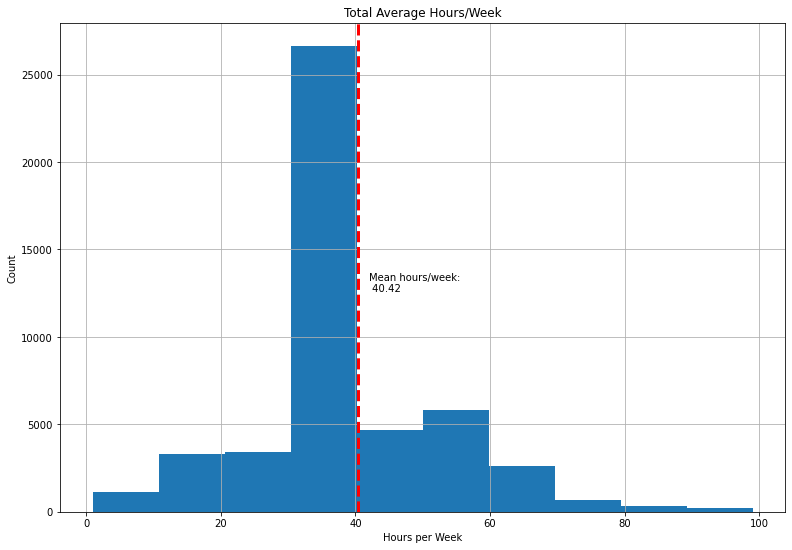

In [171]:
data['hours-per-week'].hist(figsize = (13,9))
plt.axvline(data['hours-per-week'].mean(), color='r', linestyle='dashed', linewidth=3)
min_ylim, max_ylim = plt.ylim()
plt.text(data['hours-per-week'].mean()*1.039, max_ylim*.45, 'Mean hours/week:\n {:.2f}'.format(data['hours-per-week'].mean()))
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.title('Total Average Hours/Week')

___ 

# Who works the most hours per week? 

_For this question I will pick 60 hours/week as a baseline for an above average work week._



### 85% of the people who work over 60 hours a week are male, while 15% are female.

_What factors could be the cause of such a disparity? How would this number change if traditionally female roles (such as staying at home and raising children) were included as hours worked per week?_

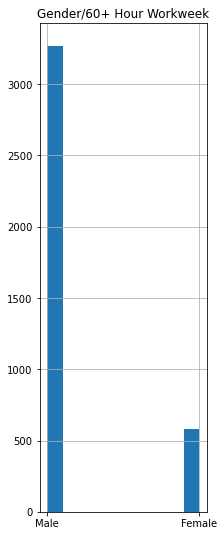

In [151]:
over_60['gender'].hist(figsize = (3,9))
plt.title('Gender/60+ Hour Workweek')
plt.show()

In [172]:
over_60['gender'].value_counts(normalize=True) * 100

Male      84.842979
Female    15.157021
Name: gender, dtype: float64

### Roughly 60% of the people who work over 60 hours/week make less than 50,000/year.


_This is odd, one might assume that people who work more hours would have a higher income._

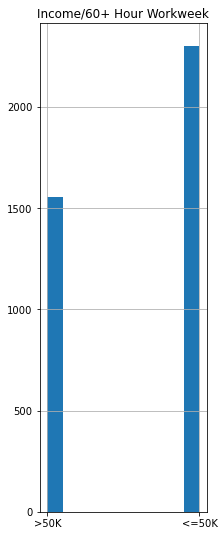

In [173]:
over_60 = data.loc[data['hours-per-week'] >= 60]

over_60['income'].hist(figsize = (3,9))
plt.title('Income/60+ Hour Workweek')
plt.show()

In [175]:
#Determining the percentage of people who make more or less than 50,000/year in the 60 hour-work-week dataset
over_60['income'].value_counts(normalize = True) * 100

<=50K    59.693745
>50K     40.306255
Name: income, dtype: float64

___

# How does education level affect the amount of hours worked in a week?

### The data suggests that people with a higher education tend to work more hours each week.

_**The average high school graduate works about 40.5 hours a week.**_

Text(0.5, 1.0, 'High School - Hours/Week')

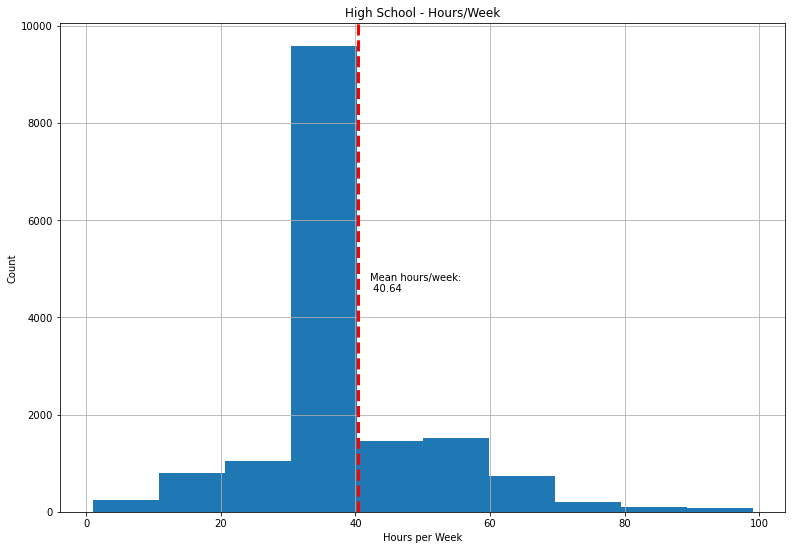

In [108]:
high_school = data.loc[data['education'] == 'HS-grad']

high_school['hours-per-week'].hist(figsize = (13,9))
plt.axvline(data['hours-per-week'].mean(), color='r', linestyle='dashed', linewidth=3)
min_ylim, max_ylim = plt.ylim()
plt.text(high_school['hours-per-week'].mean()*1.039, max_ylim*.45, 'Mean hours/week:\n {:.2f}'.format(high_school['hours-per-week'].mean()))
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.title('High School - Hours/Week')

_**The average bachelors degree graduate works about 42.5 hours a week.**_

Text(0.5, 1.0, 'Bachelors - Hours/week')

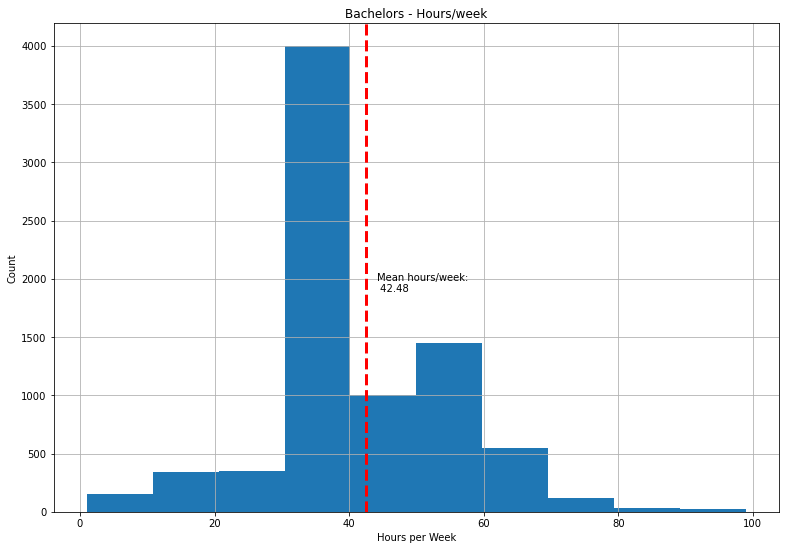

In [109]:
bachelors = data.loc[data['education'] == 'Bachelors']

bachelors['hours-per-week'].hist(figsize = (13,9))
plt.axvline(bachelors['hours-per-week'].mean(), color='r', linestyle='dashed', linewidth=3)
min_ylim, max_ylim = plt.ylim()
plt.text(bachelors['hours-per-week'].mean()*1.039, max_ylim*.45, 'Mean hours/week:\n {:.2f}'.format(bachelors['hours-per-week'].mean()))
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.title('Bachelors - Hours/week')

_**The average masters graduate works about 43.5 hours a week.**_

Text(0.5, 1.0, 'Masters - Hours/week')

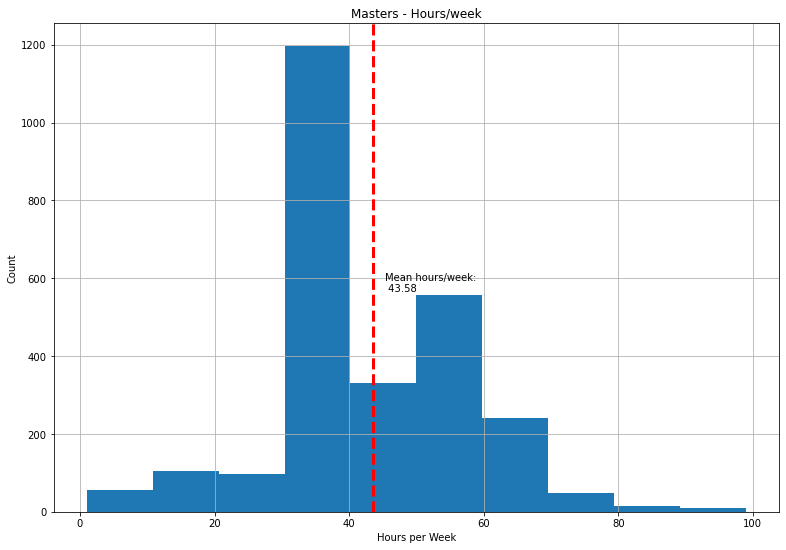

In [116]:
masters = data.loc[data['education'] == 'Masters']

masters['hours-per-week'].hist(figsize = (13,9))
plt.axvline(masters['hours-per-week'].mean(), color='r', linestyle='dashed', linewidth=3)
min_ylim, max_ylim = plt.ylim()
plt.text(masters['hours-per-week'].mean()*1.039, max_ylim*.45, 'Mean hours/week:\n {:.2f}'.format(masters['hours-per-week'].mean()))
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.title('Masters - Hours/week')

_**The average high school graduate works about 46.58 hours a week.**_

Text(0.5, 1.0, 'Doctorate - Hours/week')

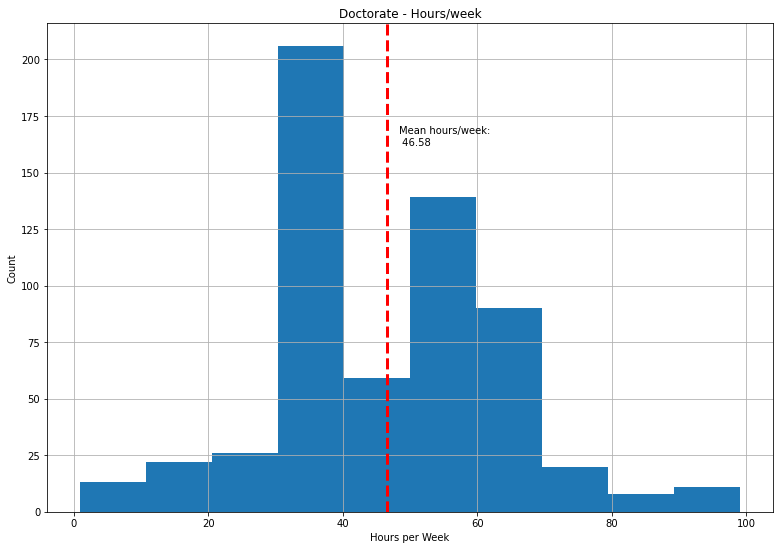

In [115]:
doctorate = data.loc[data['education'] == 'Doctorate']

doctorate['hours-per-week'].hist(figsize = (13,9))
plt.axvline(doctorate['hours-per-week'].mean(), color='r', linestyle='dashed', linewidth=3)
min_ylim, max_ylim = plt.ylim()
plt.text(doctorate['hours-per-week'].mean()*1.039, max_ylim*.75, 'Mean hours/week:\n {:.2f}'.format(doctorate['hours-per-week'].mean()))
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.title('Doctorate - Hours/week')

**Overall there are a few statistics that are quite interesting that would be great to investigate further with more data.**